In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean

# Load dataset
df = pd.read_csv("hamspam.csv.csv")

# Convert categorical values to numerical values
df['Contains Link'] = df['Contains Link'].map({'Yes': 1, 'No': 0})
df['Contains Money Words'] = df['Contains Money Words'].map({'Yes': 1, 'No': 0})
df['Length'] = df['Length'].map({'Long': 1, 'Short': 0})
df['Class'] = df['Class'].map({'Spam': 1, 'Ham': 0})

# Train-test split
X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Train KNN Classifier (K=2)
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print Results
print(f'Naïve Bayes Accuracy: {nb_accuracy:.2f}')
print(f'KNN (K=2) Accuracy: {knn_accuracy:.2f}')


Naïve Bayes Accuracy: 0.52
KNN (K=2) Accuracy: 0.53


Matplotlib is building the font cache; this may take a moment.


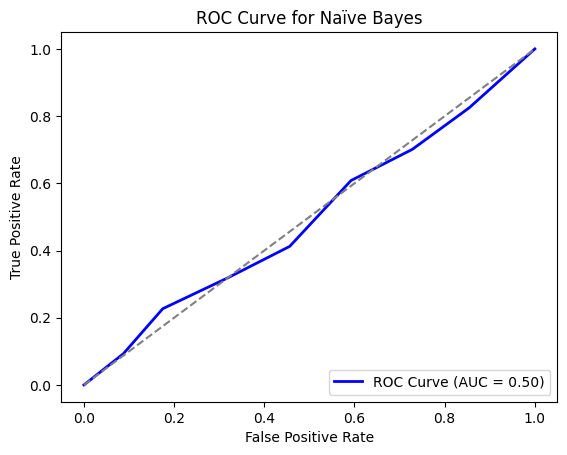

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
y_scores_nb = nb_classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes')
plt.legend(loc='lower right')
plt.show()


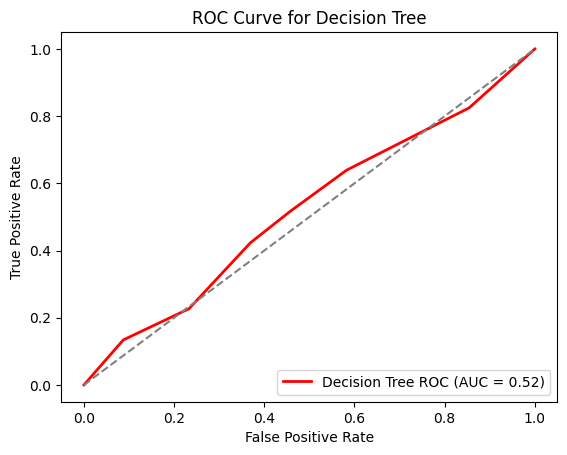

AUC Score for Decision Tree: 0.52


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)
y_scores_dt = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve for Decision Tree
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree ROC (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score for Decision Tree: {roc_auc_dt:.2f}')
